<a href="https://colab.research.google.com/github/lavanyamurudkar28/Datascience/blob/main/50_Startups4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("50_Startups.csv")

#Preparing X and Y

X = df.drop('R&D Spend', axis=1)
X = X.drop('Profit', axis=1)
Y = df['Profit']
#print(X)
#print(Y)

# Feature Selection 1
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)
'''
'''
#Feature Selection 2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()
'''

#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


'''
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)
'''


'''
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

'''
#Categorical to Numerical
'''
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

'''

#Dealing with missing values

'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
'''
#Oversampling and Under Sampling

'''
#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))
'''

'''
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

'''

'''
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()
'''


#Dealing with Outliers using Interquantile Range
'''
print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])
'''

'''
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))
'''

"\n#Principal Component Analysis\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nlogr=LogisticRegression()\npca=PCA(n_components=2)\n\nX = df.drop('Id', axis=1)\nX = X.drop('Species', axis=1)\nY = df['Species']\n\npca.fit(X)\nX=pca.transform(X)\nprint(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)\n\nlogr.fit(X_train,y_train)\n\ny_pred=logr.predict(X_test)\nprint(accuracy_score(y_test,y_pred))\n"

In [3]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # Use f_regression for numerical target
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical using LabelEncoder
le = LabelEncoder()
X['State'] = le.fit_transform(X['State'])

# Use f_regression for numerical target
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

             Specs      Score
0   Administration   2.014960
1  Marketing Spend  60.881454
2            State   0.502608


[0.16584114 0.78019303 0.05396583]


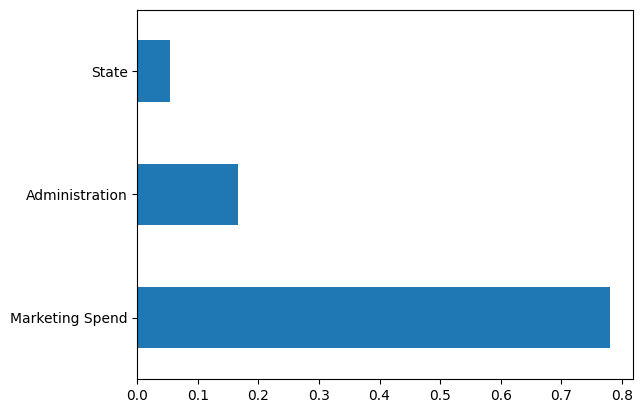

In [4]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesRegressor  # Use ExtraTreesRegressor for continuous target
import matplotlib.pyplot as plt

model = ExtraTreesRegressor()  # Change to ExtraTreesRegressor
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [6]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder



df['R&D Spend ']=pd.cut(df['R&D Spend'],3,labels=['0','1','2'])
# Ensure 'Administration' is numerical before applying pd.cut
df['Administration'] = df['Administration'].astype(float)  # Convert to numerical if it's not
df['Administration']=pd.cut(df['Administration'],3,labels=['0','1','2'])
# Check if 'Marketing Spend' is already numeric, if not convert it
if not pd.api.types.is_numeric_dtype(df['Marketing Spend']):
    df['Marketing Spend'] = df['Marketing Spend'].str.replace(',', '').astype(float)
df['Marketing Spend']=pd.cut(df['Marketing Spend'],3,labels=['0','1','2'])
# Create a new column for the binned 'State' data to avoid overwriting


print(df)
# Check if 'Id' and 'Species' columns exist before dropping
if 'Id' in df.columns:
    X = df.drop('Id', axis=1)
else:
    X = df.copy()  # Create a copy if 'Id' doesn't exist

if 'Species' in df.columns:
    X = X.drop('Species', axis=1)

Y = df['Profit']  # Assuming 'Profit' is the target variable, as in the initial code
print(Y)
# Convert 'State' to numerical before applying pd.cut if it's categorical
le = LabelEncoder()
df['State_encoded'] = le.fit_transform(df['State'])  # Create a new numerical column

df['State_encoded'] = pd.cut(df['State_encoded'], 3, labels=['0','1','2'])  # Bin the numerical version

print(df)

    R&D Spend Administration Marketing Spend       State     Profit R&D Spend 
0   165349.20              1               2    New York  192261.83          2
1   162597.70              2               2  California  191792.06          2
2   153441.51              1               2     Florida  191050.39          2
3   144372.41              1               2    New York  182901.99          2
4   142107.34              0               2     Florida  166187.94          2
5   131876.90              1               2    New York  156991.12          2
6   134615.46              2               0  California  156122.51          2
7   130298.13              2               2     Florida  155752.60          2
8   120542.52              2               1    New York  152211.77          2
9   123334.88              1               1  California  149759.96          2
10  101913.08              1               1     Florida  146121.95          1
11  100671.96              0               1  Califo

In [7]:
#Categorical to Numerical

le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [8]:
#Dealing with missing values

print(df.columns) # Print the columns of the DataFrame to verify if 'Item_Weight' exists

print(df.isnull().sum())

# Proceed with filling missing values only if 'Item_Weight' exists
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True) #Imputing Numerical Values

# Check if 'Outlet_Size' exists before filling missing values
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
else:
    print("Column 'Outlet_Size' not found in DataFrame.")

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'R&D Spend ', 'State_encoded'],
      dtype='object')
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
R&D Spend          0
State_encoded      0
dtype: int64
Column 'Outlet_Size' not found in DataFrame.


Counter({49: 1, 48: 1, 47: 1, 46: 1, 45: 1, 44: 1, 43: 1, 42: 1, 41: 1, 40: 1, 39: 1, 38: 1, 37: 1, 36: 1, 35: 1, 34: 1, 33: 1, 32: 1, 31: 1, 30: 1, 29: 1, 28: 1, 27: 1, 26: 1, 25: 1, 24: 1, 23: 1, 22: 1, 21: 1, 20: 1, 19: 1, 18: 1, 17: 1, 16: 1, 15: 1, 14: 1, 13: 1, 12: 1, 11: 1, 10: 1, 9: 1, 8: 1, 7: 1, 6: 1, 5: 1, 4: 1, 3: 1, 2: 1, 1: 1, 0: 1})
Counter({49: 1, 48: 1, 47: 1, 46: 1, 45: 1, 44: 1, 43: 1, 42: 1, 41: 1, 40: 1, 39: 1, 38: 1, 37: 1, 36: 1, 35: 1, 34: 1, 33: 1, 32: 1, 31: 1, 30: 1, 29: 1, 28: 1, 27: 1, 26: 1, 25: 1, 24: 1, 23: 1, 22: 1, 21: 1, 20: 1, 19: 1, 18: 1, 17: 1, 16: 1, 15: 1, 14: 1, 13: 1, 12: 1, 11: 1, 10: 1, 9: 1, 8: 1, 7: 1, 6: 1, 5: 1, 4: 1, 3: 1, 2: 1, 1: 1, 0: 1})


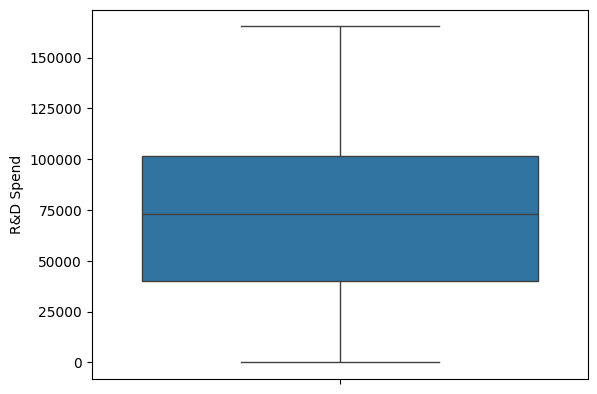

In [9]:
#Oversampling and Under Sampling


#a = (df['Species'] == '50_startups').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))



from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)




#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['R&D Spend'])
plt.show()

In [10]:
#Dealing with Outliers using Interquantile Range

print(df['R&D Spend'])
Q1 = df['R&D Spend'].quantile(0.25)
Q3 = df['R&D Spend'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['R&D Spend'] < lower].values
out2=df[df['R&D Spend'] > upper].values

df['R&D Spend'].replace(out1,lower,inplace=True)
df['R&D Spend'].replace(out2,upper,inplace=True)

print(df['R&D Spend'])


0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120542.52
9     123334.88
10    101913.08
11    100671.96
12     93863.75
13     91992.39
14    119943.24
15    114523.61
16     78013.11
17     94657.16
18     91749.16
19     86419.70
20     76253.86
21     78389.47
22     73994.56
23     67532.53
24     77044.01
25     64664.71
26     75328.87
27     72107.60
28     66051.52
29     65605.48
30     61994.48
31     61136.38
32     63408.86
33     55493.95
34     46426.07
35     46014.02
36     28663.76
37     44069.95
38     20229.59
39     38558.51
40     28754.33
41     27892.92
42     23640.93
43     15505.73
44     22177.74
45      1000.23
46      1315.46
47         0.00
48       542.05
49         0.00
Name: R&D Spend, dtype: float64
61666.43
194102.445
-52563.275
0     165349.20
1     162597.70
2     153441.51
3     144372.41
4     142107.34
5     131876.90
6     134615.46
7     130298.13
8     120

In [11]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

logr=LogisticRegression()
pca=PCA(n_components=2)

# Check if 'Id' column exists before dropping
if 'Id' in df.columns:
    X = df.drop('Id', axis=1)
else:
    print("Column 'Id' not found in DataFrame. Proceeding without dropping.")
    X = df.copy()  # Create a copy to avoid modifying the original df

# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object (string) type
        X[column] = label_encoder.fit_transform(X[column])

# Similarly, check for 'Species' column
if 'Administration' in X.columns:
    X = X.drop('Administration', axis=1)
else:
    print("Column 'Species' not found in DataFrame. Proceeding without dropping.")

Y = df['Administration']  # Assuming 'Species' exists in the original df

pca.fit(X)
X=pca.transform(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

Column 'Id' not found in DataFrame. Proceeding without dropping.
[[ 1.21801244e+05 -6.12098817e+01]
 [ 1.19421127e+05 -1.51945502e+03]
 [ 1.12041787e+05 -6.99039846e+03]
 [ 9.98508406e+04 -6.82967367e+03]
 [ 8.71403529e+04  4.25786494e+03]
 [ 7.33850210e+04  4.44291915e+03]
 [ 7.48741091e+04  6.89991142e+03]
 [ 7.13813002e+04  4.33545085e+03]
 [ 6.17076568e+04  5.76458191e+02]
 [ 6.21947366e+04  4.26039628e+03]
 [ 4.36771017e+04 -7.10735776e+03]
 [ 4.15165886e+04 -6.52284546e+03]
 [ 3.46320303e+04 -8.99351623e+03]
 [ 2.84311446e+04 -4.74819371e+03]
 [ 4.83445140e+04  1.49397147e+04]
 [ 4.24972801e+04  1.33922178e+04]
 [ 1.30939414e+04 -8.44835692e+03]
 [ 2.45518749e+04  3.73248300e+03]
 [ 2.16366997e+04  2.64811050e+03]
 [ 1.66445815e+04  2.60199618e+02]
 [ 6.16043976e+03 -3.19543654e+03]
 [ 3.05235566e+03  3.60020231e+03]
 [-8.87906888e+02  1.42933981e+03]
 [-6.81682957e+03 -1.60784193e+03]
 [ 2.21722001e+02  4.79216975e+03]
 [-9.85069917e+03 -2.49553329e+03]
 [-2.92500915e+03  5.7840

In [12]:
#Clustering

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
irs=load_iris()
x=irs.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

[[4.9972973  3.38918919 1.45405405 0.24054054]
 [5.84390244 2.7097561  4.32926829 1.40731707]
 [6.90588235 3.09705882 5.70294118 2.07058824]]
[1 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


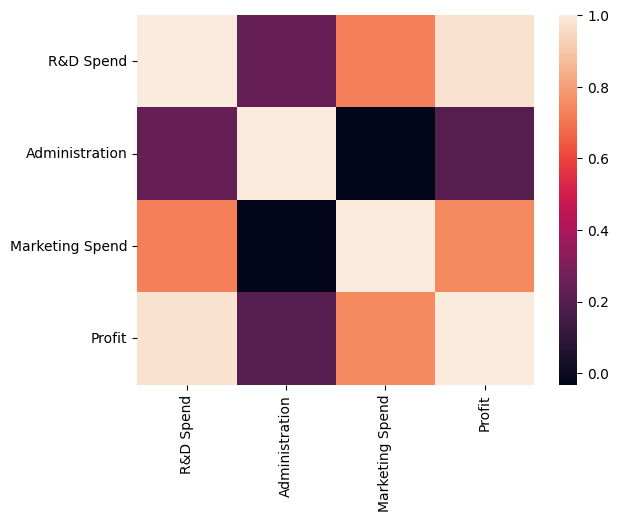

In [16]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("50_Startups.csv")


#Preparing X and Y

X = df.drop('R&D Spend', axis=1)
X = X.drop('Profit', axis=1)
Y = df['Profit']



'''
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.title("Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
'''

'''
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()
'''

'''
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(df["Species"], df["PetalLengthCm"])
plt.title("Bar Plot")
plt.show()
'''

'''
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()
'''

'''
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data = df)
plt.title("Count Plot for Species")
plt.show()
'''

'''
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='SepalLengthCm', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()
'''


#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr())
plt.show()

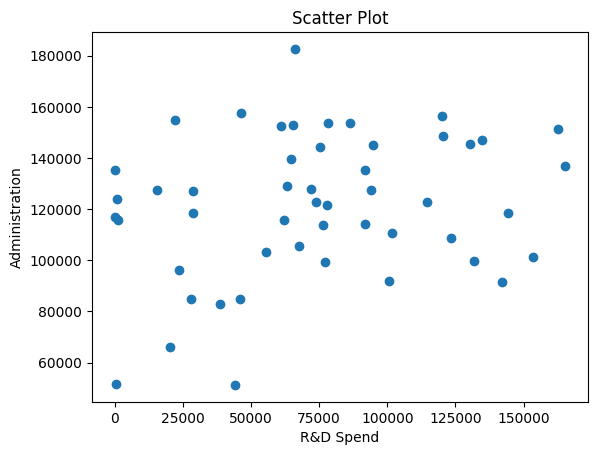

In [17]:
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["R&D Spend"], df["Administration"])
plt.title("Scatter Plot")
plt.xlabel("R&D Spend")
plt.ylabel("Administration")
plt.show()


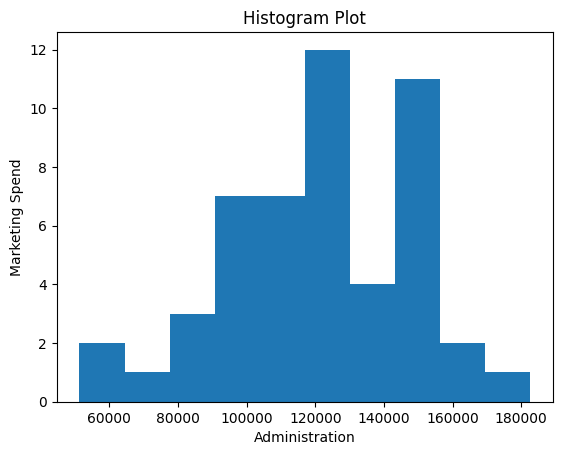

In [18]:
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Administration"])
plt.title("Histogram Plot")
plt.xlabel("Administration")
plt.ylabel("Marketing Spend")
plt.show()


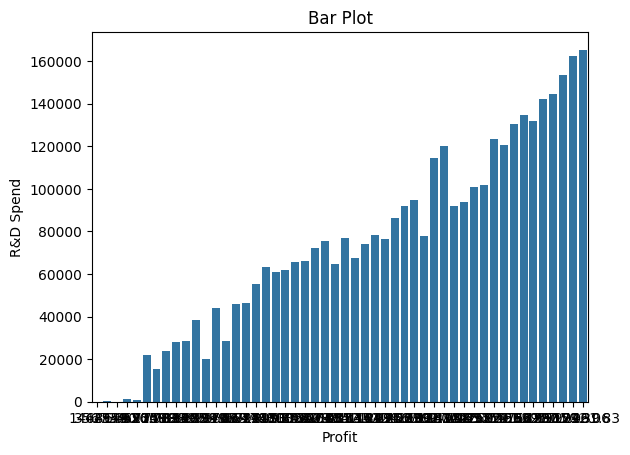

In [19]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x='Profit', y='R&D Spend', data=df) # Pass x and y as keyword arguments and provide the data source
plt.title("Bar Plot")
plt.show()


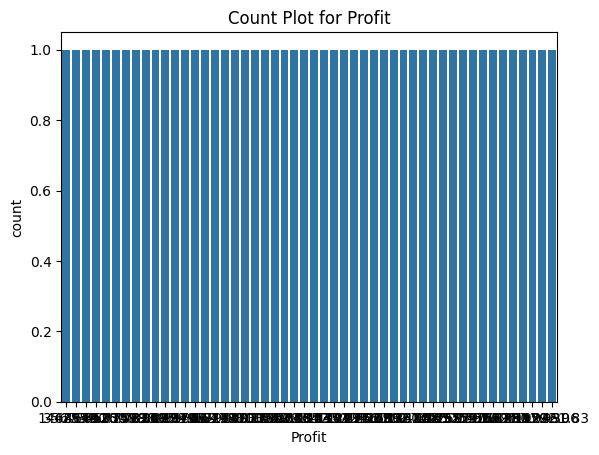

In [20]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Profit', data = df)
plt.title("Count Plot for Profit")
plt.show()

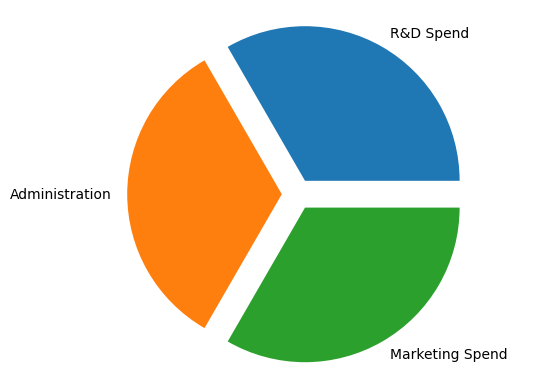

In [21]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["R&D Spend", "Administration", "Marketing Spend"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()



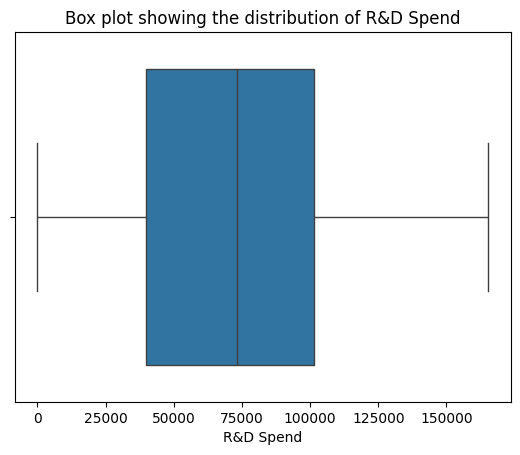

In [22]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='R&D Spend', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of R&D Spend")
plt.show()